In [1]:
# Import libraries

import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/expenditure-in-the-salisbury-nhs-v2/expenditure_v2.csv


In [3]:
df = pd.read_csv('../input/expenditure-in-the-salisbury-nhs-v2/expenditure_v2.csv')
df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Department Family,Entity,Date,Expense Type,Expense Area,Supplier,Transaction Number,Expenditure
0,Department of Health,Salisbury NHS Foundation Trust,2010-04-16,RATES,Facilities Directorate,WILTSHIRE COUNCIL,Apr-10,96071.17
1,Department of Health,Salisbury NHS Foundation Trust,2010-04-16,DRUGS,Clinical Support and Family Services,ROCHE PRODUCTS LTD,1321217701,25028.5
2,Department of Health,Salisbury NHS Foundation Trust,2010-04-16,DRUGS,Clinical Support and Family Services,ROCHE PRODUCTS LTD,1321217701,4379.99
3,Department of Health,Salisbury NHS Foundation Trust,2010-04-16,HEALTHCARE - NHS TRUSTS,Clinical Support and Family Services,ROYAL UNITED HOSPITAL BATH NHS TRUST,10291263,71642.5
4,Department of Health,Salisbury NHS Foundation Trust,2010-04-16,HEALTHCARE - NHS TRUSTS,Medicine,SOUTHAMPTON UNIV HOSPITAL NHS TRUST,7166068,26815.21


In [4]:
# Check data types

df['Expenditure'].dtypes

dtype('O')

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [6]:
df.isna().sum()

Department Family      0
Entity                 0
Date                   0
Expense Type           0
Expense Area          21
Supplier               0
Transaction Number     0
Expenditure            0
dtype: int64

In [7]:
# Cast to string

df["Expenditure"] = df["Expenditure"].astype(str)

In [8]:
# Parse string and remove non-numeric characters 

def make_decimal(x):
    non_decimal = re.compile(r'[^\d.]+')
    non_decimal = non_decimal.sub('', x)
    
    return non_decimal

In [9]:
df["Expenditure"] = df["Expenditure"].apply(make_decimal)

In [10]:
df.head()

,Department Family,Entity,Date,Expense Type,Expense Area,Supplier,Transaction Number,Expenditure
0,Department of Health,Salisbury NHS Foundation Trust,2010-04-16,RATES,Facilities Directorate,WILTSHIRE COUNCIL,Apr-10,96071.17
1,Department of Health,Salisbury NHS Foundation Trust,2010-04-16,DRUGS,Clinical Support and Family Services,ROCHE PRODUCTS LTD,1321217701,25028.5
2,Department of Health,Salisbury NHS Foundation Trust,2010-04-16,DRUGS,Clinical Support and Family Services,ROCHE PRODUCTS LTD,1321217701,4379.99
3,Department of Health,Salisbury NHS Foundation Trust,2010-04-16,HEALTHCARE - NHS TRUSTS,Clinical Support and Family Services,ROYAL UNITED HOSPITAL BATH NHS TRUST,10291263,71642.5
4,Department of Health,Salisbury NHS Foundation Trust,2010-04-16,HEALTHCARE - NHS TRUSTS,Medicine,SOUTHAMPTON UNIV HOSPITAL NHS TRUST,7166068,26815.21


In [11]:
# Check al correctly converted

df.isna().sum()

Department Family      0
Entity                 0
Date                   0
Expense Type           0
Expense Area          21
Supplier               0
Transaction Number     0
Expenditure            0
dtype: int64

In [12]:
df['Expenditure'] = pd.to_numeric(df['Expenditure'], errors='coerce')

In [13]:
# Check all correctly converted again

df.isna().sum()

Department Family      0
Entity                 0
Date                   0
Expense Type           0
Expense Area          21
Supplier               0
Transaction Number     0
Expenditure            0
dtype: int64

In [14]:
# Describe the columns
    
for col in df.columns:
    print ("There are {} unique values in the {} column.\n".format(len(df[col].unique()), col))

There are 1 unique values in the Department Family column.

There are 1 unique values in the Entity column.

There are 535 unique values in the Date column.

There are 289 unique values in the Expense Type column.

There are 211 unique values in the Expense Area column.

There are 375 unique values in the Supplier column.

There are 3027 unique values in the Transaction Number column.

There are 19137 unique values in the Expenditure column.



In [15]:
# Remove unnecessary columns

df.drop(["Department Family", "Entity"], axis=1, inplace=True)

In [16]:
df.head()

,Date,Expense Type,Expense Area,Supplier,Transaction Number,Expenditure
0,2010-04-16,RATES,Facilities Directorate,WILTSHIRE COUNCIL,Apr-10,96071.17
1,2010-04-16,DRUGS,Clinical Support and Family Services,ROCHE PRODUCTS LTD,1321217701,25028.50
2,2010-04-16,DRUGS,Clinical Support and Family Services,ROCHE PRODUCTS LTD,1321217701,4379.99
3,2010-04-16,HEALTHCARE - NHS TRUSTS,Clinical Support and Family Services,ROYAL UNITED HOSPITAL BATH NHS TRUST,10291263,71642.50
4,2010-04-16,HEALTHCARE - NHS TRUSTS,Medicine,SOUTHAMPTON UNIV HOSPITAL NHS TRUST,7166068,26815.21


In [17]:
len(df)

804799

In [18]:
# See what NaN rows are like

df.loc[df["Expense Area"].isna() == True]

,Date,Expense Type,Expense Area,Supplier,Transaction Number,Expenditure
185190,2012-01-13,NHS LOGISTICS CREDITS,NaN,NHS LOGISTICS,1012157091,783.43
185197,2012-01-13,NHS LOGISTICS CREDITS,NaN,NHS LOGISTICS,1012157091,156.69
192713,2012-01-13,NHS LOGISTICS CREDITS,NaN,NHS LOGISTICS,1012161771,117.74
194948,2012-01-13,NHS LOGISTICS CREDITS,NaN,NHS LOGISTICS,1012161771,833.33
194949,2012-01-13,NHS LOGISTICS CREDITS,NaN,NHS LOGISTICS,1012161771,140.83
196778,2012-01-27,HARD/SOFTWARE-COMPUTER SOFTWARE OFF THE SHELF...,NaN,SOFTCAT LIMITED,INV00601447,1478.46
196780,2012-01-27,HARD/SOFTWARE-COMPUTER SOFTWARE OFF THE SHELF...,NaN,SOFTCAT LIMITED,INV00601447,7392.30
497171,2015-10-02,Medical Agecy Spend,NaN,TALENT HUMAN CAPITAL MANAGEMENT LTD,2001068,26240.30
503135,2015-11-20,DISPOSABLE THEATRE DRAPES WIPES,NaN,NHS LOGISTICS,1016132812,16.25
503625,2015-11-20,PATIENTS BEDWEAR UNISEX,NaN,NHS LOGISTICS,1016127607,24.00


In [19]:
df.fillna("Unknown", inplace=True)

In [20]:
df.isna().sum()

Date                  0
Expense Type          0
Expense Area          0
Supplier              0
Transaction Number    0
Expenditure           0
dtype: int64

In [21]:
df["Year"] = df['Date'].dt.year
df.head()

,Date,Expense Type,Expense Area,Supplier,Transaction Number,Expenditure,Year
0,2010-04-16,RATES,Facilities Directorate,WILTSHIRE COUNCIL,Apr-10,96071.17,2010
1,2010-04-16,DRUGS,Clinical Support and Family Services,ROCHE PRODUCTS LTD,1321217701,25028.50,2010
2,2010-04-16,DRUGS,Clinical Support and Family Services,ROCHE PRODUCTS LTD,1321217701,4379.99,2010
3,2010-04-16,HEALTHCARE - NHS TRUSTS,Clinical Support and Family Services,ROYAL UNITED HOSPITAL BATH NHS TRUST,10291263,71642.50,2010
4,2010-04-16,HEALTHCARE - NHS TRUSTS,Medicine,SOUTHAMPTON UNIV HOSPITAL NHS TRUST,7166068,26815.21,2010


### Transactions by Number of Transactions and Total Expenditure

In [22]:
# Calculate by expenditure and by transaction number


# by Expense Type
df_x_type = df.groupby(['Expense Type']).agg({'Expenditure': 'sum'})
df_x_type["% of Total Expenditure"] = df_x_type.apply(lambda x: (100 * x) / float(x.sum()))
df_x_type["No. of Transactions"] = df['Expense Type'].value_counts()
df_x_type["% of Total Transactions"] = (df['Expense Type'].value_counts(normalize=True) * 100)
df_x_type.sort_values("Expenditure", ascending = False, inplace=True)

# By Expense Area
df_x_area = df.groupby(['Expense Area']).agg({'Expenditure': 'sum'})
df_x_area["% of Total Expenditure"] = df_x_area.apply(lambda x: (100 * x) / float(x.sum()))
df_x_area["No. of Transactions"] = df['Expense Area'].value_counts()
df_x_area["% of Total Transactions"] = (df['Expense Area'].value_counts(normalize=True) * 100)
df_x_area.sort_values("Expenditure", ascending = False, inplace=True)

# By supplier
df_supplier = df.groupby(['Supplier']).agg({'Expenditure': 'sum'})
df_supplier["% of Total Expenditure"] = df_supplier.apply(lambda x: (100 * x) / float(x.sum()))
df_supplier["No. of Transactions"] = df['Supplier'].value_counts()
df_supplier["% of Total Transactions"] = (df['Supplier'].value_counts(normalize=True) * 100)
df_supplier.sort_values("Expenditure", ascending = False, inplace=True)

In [23]:
df_x_type.head()

,Expenditure,% of Total Expenditure,No. of Transactions,% of Total Transactions
Expense Type,,,,
ETS UNITARY CHARGE,28082887.73,13.124170,98,0.012177
DRUGS,15064663.22,7.040273,14771,1.835365
HEALTHCARE - NHS TRUSTS,13122491.75,6.132625,551,0.068464
BLDG STRUCTURES MAIN CONTR,11530899.60,5.388815,242,0.030070
NETWORKING COSTS,11376942.46,5.316865,553,0.068713


In [24]:
df_x_area.head()

,Expenditure,% of Total Expenditure,No. of Transactions,% of Total Transactions
Expense Area,,,,
Facilities Directorate,4.496786e+07,21.015140,68738,8.541015
Clinical Support and Family Services,3.763960e+07,17.590377,109166,13.564381
Capital Projects,2.887126e+07,13.492606,1714,0.212972
Clinical Support,1.291566e+07,6.035964,34358,4.269140
CAPITAL PROJECTS,1.048075e+07,4.898039,346,0.042992


In [25]:
df_supplier.head()

,Expenditure,% of Total Expenditure,No. of Transactions,% of Total Transactions
Supplier,,,,
SALISBURY HEALTHCARE FACILITIES LTD,2.891839e+07,13.514630,129,0.016029
NHS LOGISTICS,2.005461e+07,9.372260,793496,98.595550
WILTSHIRE COUNCIL,9.253817e+06,4.324650,147,0.018265
CSC COMPUTER SCIENCES LTD,8.033669e+06,3.754430,83,0.010313
CORONA ENERGY,7.354617e+06,3.437084,239,0.029697


# Data Visualization

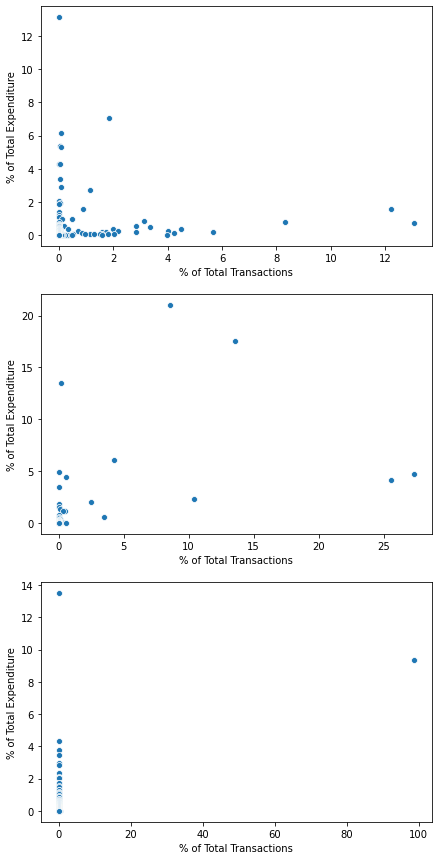

In [26]:
fig, ax = plt.subplots(3, 1, figsize=(7,15))

sns.scatterplot(x=df_x_type["% of Total Transactions"], y=df_x_type["% of Total Expenditure"], ax=ax[0])
sns.scatterplot(x=df_x_area["% of Total Transactions"], y=df_x_area["% of Total Expenditure"], ax=ax[1])
sns.scatterplot(x=df_supplier["% of Total Transactions"], y=df_supplier["% of Total Expenditure"], ax=ax[2])
plt.show()

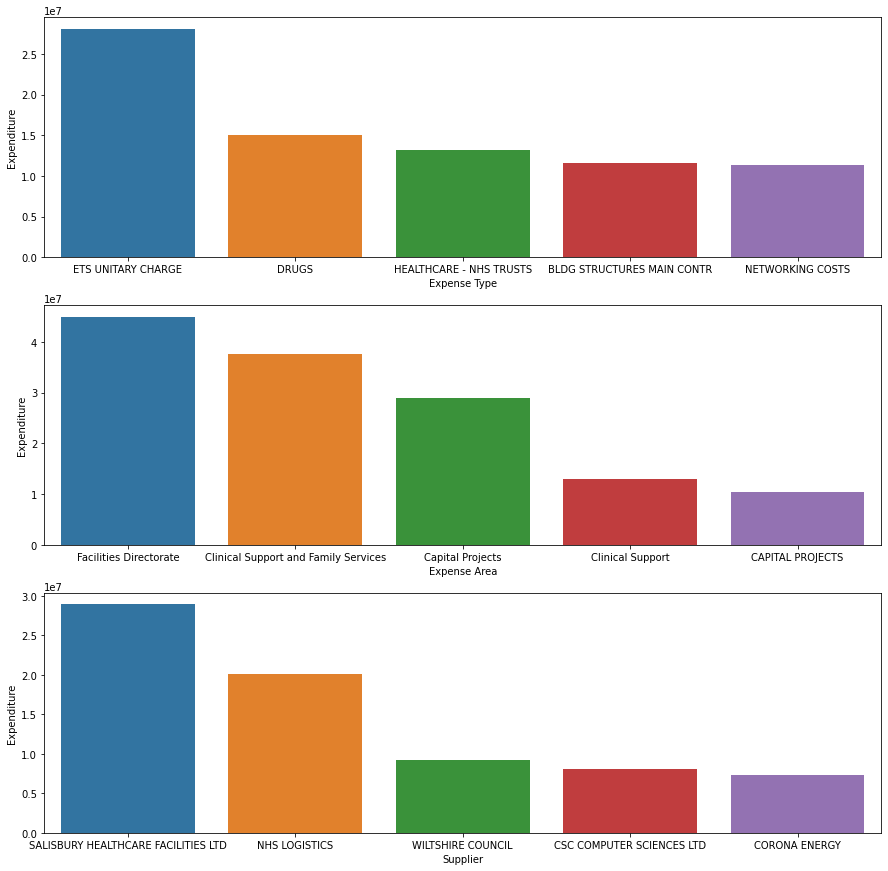

In [27]:
fig, ax = plt.subplots(3, 1, figsize=(15,15))

sns.barplot(x=df_x_type.head().index, y="Expenditure", data=df_x_type.head(), ax=ax[0])
sns.barplot(x=df_x_area.head().index, y="Expenditure", data=df_x_area.head(), ax=ax[1])
sns.barplot(x=df_supplier.head().index, y="Expenditure", data=df_supplier.head(), ax=ax[2])

# Save DataFrames

In [28]:
df.to_csv('all_data.csv', index=False)
df_x_type.to_csv('numbers_by_expense_type.csv', index=False)
df_x_area.to_csv('numbers_by_expense_area.csv', index=False)
df_supplier.to_csv('numbers_by_supplier.csv', index=False)